THE FIRST THING TO DO BEFORE STARTING THE PROJECT IS TO IMPORT THE NECESSARY LIBRARIES. \
PANDAS IS A LIBRARY FOR MANIPULATING DATA FRAMES. \
MATPLOTLIB IS A LIBRARY FOR PLOTTING. \
SEABORN IS A LIBRARY FOR PLOTTING.

In [1]:
# %pip install pandas

In [2]:
# %pip install matplotlib

In [3]:
# %pip install seaborn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

AFTER THE LIBRARIES HAVE BEEN INSTALLED AND LOADED, THE NEXT STEP IS TO \
IMPORT THE DATA.

In [5]:
df = pd.read_csv("../data/GlobalLandTemperaturesByMajorCity.csv", parse_dates=['dt'])
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


USE THE .INFO() METHOD TO SEE THE DIMENSIONS OF THE DATA.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             239177 non-null  datetime64[ns]
 1   AverageTemperature             228175 non-null  float64       
 2   AverageTemperatureUncertainty  228175 non-null  float64       
 3   City                           239177 non-null  object        
 4   Country                        239177 non-null  object        
 5   Latitude                       239177 non-null  object        
 6   Longitude                      239177 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 12.8+ MB


USE THE .DESCRIBE() METHOD TO SEE THE MEAN, MEDIAN, AND STANDARD DEVIATION OF \
EACH COLUMN.

In [7]:
print(df.describe()) # summary statistics

       AverageTemperature  AverageTemperatureUncertainty
count       228175.000000                  228175.000000
mean            18.125969                       0.969343
std             10.024800                       0.979644
min            -26.772000                       0.040000
25%             12.710000                       0.340000
50%             20.428000                       0.592000
75%             25.918000                       1.320000
max             38.283000                      14.037000


THE .SHAPE() METHOD WILL RETURN THE NUMBER OF ROWS AND COLUMNS IN THE DATA.

In [8]:
df.shape

(239177, 7)

THE .ISNA() METHOD WILL RETURN A BOOLEAN ARRAY INDICATING WHETHER THERE IS \
ANY MISSING DATA IN EACH COLUMN.

In [9]:
df.isna().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [10]:
# percentage losses of data
df.isna().sum() / df.shape[0]

dt                               0.000000
AverageTemperature               0.045999
AverageTemperatureUncertainty    0.045999
City                             0.000000
Country                          0.000000
Latitude                         0.000000
Longitude                        0.000000
dtype: float64

In [11]:
df.dropna(inplace=True) # drop all rows with missing values

In [12]:
df.isna().sum() # check if there are any missing values

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [13]:
df.head()   # check the first 5 rows

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [14]:
df[['City', 'Country']]

,City,Country
0,Abidjan,Côte D'Ivoire
1,Abidjan,Côte D'Ivoire
2,Abidjan,Côte D'Ivoire
3,Abidjan,Côte D'Ivoire
4,Abidjan,Côte D'Ivoire
...,...,...
239171,Xian,China
239172,Xian,China
239173,Xian,China
239174,Xian,China


In [15]:
df[df.Country == "Canada"]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
151957,1743-11-01,-1.854,1.734,Montreal,Canada,45.81N,72.69W
151962,1744-04-01,5.164,2.209,Montreal,Canada,45.81N,72.69W
151963,1744-05-01,12.306,1.541,Montreal,Canada,45.81N,72.69W
151964,1744-06-01,18.401,1.460,Montreal,Canada,45.81N,72.69W
151965,1744-07-01,19.320,1.331,Montreal,Canada,45.81N,72.69W
...,...,...,...,...,...,...,...
232924,2013-05-01,13.818,0.278,Toronto,Canada,44.20N,80.50W
232925,2013-06-01,17.367,0.226,Toronto,Canada,44.20N,80.50W
232926,2013-07-01,20.460,0.290,Toronto,Canada,44.20N,80.50W
232927,2013-08-01,18.520,0.342,Toronto,Canada,44.20N,80.50W


In [16]:
df[df.Country == "Canada"].City.unique()    # unique values

array(['Montreal', 'Toronto'], dtype=object)

In [17]:
df.Country.value_counts()   

China                                 34952
India                                 34627
Brazil                                12139
Turkey                                 9239
United States                          8237
Egypt                                  7550
Pakistan                               6490
Russia                                 6332
Canada                                 6282
Nigeria                                5200
Australia                              4138
Japan                                  4050
Colombia                               4003
Saudi Arabia                           3856
Indonesia                              3758
South Africa                           3746
Spain                                  3166
Italy                                  3166
Germany                                3166
United Kingdom                         3166
Ukraine                                3166
France                                 3166
Morocco                         

In [18]:
df_north_america = df[(df.Country == "Canada") | (df.Country == "United States")]
df_north_america.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
51674,1743-11-01,5.436,2.205,Chicago,United States,42.59N,87.27W
51679,1744-04-01,8.766,2.357,Chicago,United States,42.59N,87.27W
51680,1744-05-01,11.605,2.102,Chicago,United States,42.59N,87.27W
51681,1744-06-01,17.965,1.989,Chicago,United States,42.59N,87.27W
51682,1744-07-01,21.680,1.786,Chicago,United States,42.59N,87.27W


In [19]:
df_north_america.City.value_counts()

Chicago        3141
Montreal       3141
Toronto        3141
New York       3119
Los Angeles    1977
Name: City, dtype: int64

In [20]:
df_south_america = df[(df.Country == "Brazil") | (df.Country == "Argentina") | (df.Country == "Chile") | (df.Country == "Colombia") | (df.Country == "Peru")]
df_south_america.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
22319,1832-01-01,22.516,1.556,Belo Horizonte,Brazil,20.09S,44.36W
22320,1832-02-01,23.198,3.471,Belo Horizonte,Brazil,20.09S,44.36W
22321,1832-03-01,22.188,1.667,Belo Horizonte,Brazil,20.09S,44.36W
22322,1832-04-01,20.045,2.743,Belo Horizonte,Brazil,20.09S,44.36W
22323,1832-05-01,18.500,2.253,Belo Horizonte,Brazil,20.09S,44.36W


In [21]:
df_south_america.City.value_counts()

Belo Horizonte    2096
Brasília          2096
Rio De Janeiro    2096
São Paulo         2096
Salvador          2096
Bogotá            2018
Cali              1985
Santiago          1900
Fortaleza         1659
Lima              1521
Name: City, dtype: int64

In [22]:
df_north_america.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [23]:
df_south_america.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [24]:
df_north_america.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14519 entries, 51674 to 232928
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             14519 non-null  datetime64[ns]
 1   AverageTemperature             14519 non-null  float64       
 2   AverageTemperatureUncertainty  14519 non-null  float64       
 3   City                           14519 non-null  object        
 4   Country                        14519 non-null  object        
 5   Latitude                       14519 non-null  object        
 6   Longitude                      14519 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 907.4+ KB


In [25]:
df_north_america.AverageTemperature.describe()

count    14519.000000
mean         8.597257
std         10.009421
min        -18.363000
25%          0.599000
50%          9.929000
75%         17.413500
max         29.141000
Name: AverageTemperature, dtype: float64

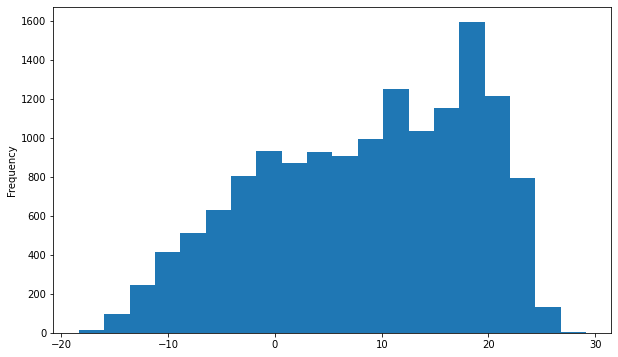

In [26]:
# make a plot of the temperature data
plt.figure(figsize=(10,6))
df_north_america.AverageTemperature.plot(kind='hist', bins=20)
plt.show()

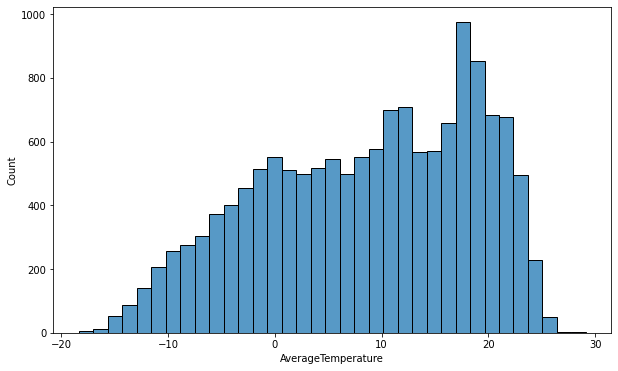

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(df_north_america.AverageTemperature)
plt.show()

<AxesSubplot:ylabel='Frequency'>

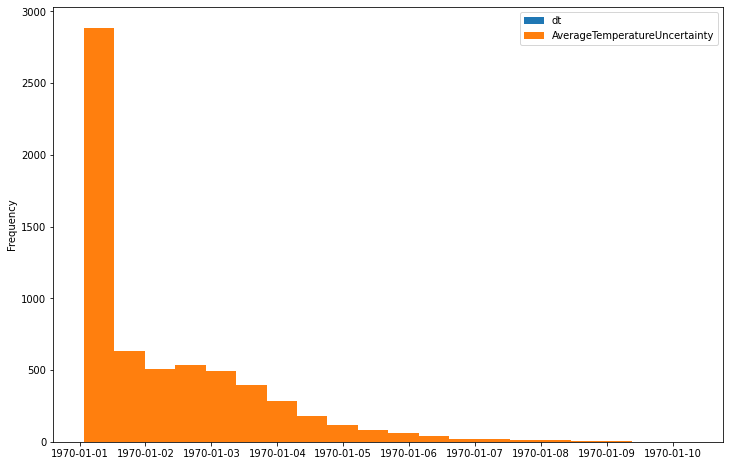

In [28]:

df[(df.Country == "Canada") & (df.AverageTemperature)].plot(kind='hist', bins=20, x='AverageTemperature', figsize=(12,8))

In [29]:
df_north_america[(df_north_america["Country"] == "Canada") & (df_north_america["AverageTemperature"]) < 10]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
51674,1743-11-01,5.436,2.205,Chicago,United States,42.59N,87.27W
51679,1744-04-01,8.766,2.357,Chicago,United States,42.59N,87.27W
51680,1744-05-01,11.605,2.102,Chicago,United States,42.59N,87.27W
51681,1744-06-01,17.965,1.989,Chicago,United States,42.59N,87.27W
51682,1744-07-01,21.680,1.786,Chicago,United States,42.59N,87.27W
...,...,...,...,...,...,...,...
232924,2013-05-01,13.818,0.278,Toronto,Canada,44.20N,80.50W
232925,2013-06-01,17.367,0.226,Toronto,Canada,44.20N,80.50W
232926,2013-07-01,20.460,0.290,Toronto,Canada,44.20N,80.50W
232927,2013-08-01,18.520,0.342,Toronto,Canada,44.20N,80.50W


In [30]:
df_select = df[df["Country"].isin(["Canada", "United States", "Brazil", "Portugal"])]

In [31]:
df_select.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
22319,1832-01-01,22.516,1.556,Belo Horizonte,Brazil,20.09S,44.36W
22320,1832-02-01,23.198,3.471,Belo Horizonte,Brazil,20.09S,44.36W
22321,1832-03-01,22.188,1.667,Belo Horizonte,Brazil,20.09S,44.36W
22322,1832-04-01,20.045,2.743,Belo Horizonte,Brazil,20.09S,44.36W
22323,1832-05-01,18.500,2.253,Belo Horizonte,Brazil,20.09S,44.36W
22324,1832-06-01,18.043,2.059,Belo Horizonte,Brazil,20.09S,44.36W
22325,1832-07-01,17.749,2.747,Belo Horizonte,Brazil,20.09S,44.36W
22326,1832-08-01,18.510,2.570,Belo Horizonte,Brazil,20.09S,44.36W
22327,1832-09-01,19.754,2.998,Belo Horizonte,Brazil,20.09S,44.36W
22328,1832-10-01,20.629,2.249,Belo Horizonte,Brazil,20.09S,44.36W


In [32]:
df_select.tail(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
232919,2012-12-01,-1.003,0.356,Toronto,Canada,44.20N,80.50W
232920,2013-01-01,-4.681,0.235,Toronto,Canada,44.20N,80.50W
232921,2013-02-01,-6.743,0.519,Toronto,Canada,44.20N,80.50W
232922,2013-03-01,-1.862,0.449,Toronto,Canada,44.20N,80.50W
232923,2013-04-01,4.657,0.318,Toronto,Canada,44.20N,80.50W
232924,2013-05-01,13.818,0.278,Toronto,Canada,44.20N,80.50W
232925,2013-06-01,17.367,0.226,Toronto,Canada,44.20N,80.50W
232926,2013-07-01,20.460,0.290,Toronto,Canada,44.20N,80.50W
232927,2013-08-01,18.520,0.342,Toronto,Canada,44.20N,80.50W
232928,2013-09-01,14.599,1.274,Toronto,Canada,44.20N,80.50W


In [33]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26658 entries, 22319 to 232928
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             26658 non-null  datetime64[ns]
 1   AverageTemperature             26658 non-null  float64       
 2   AverageTemperatureUncertainty  26658 non-null  float64       
 3   City                           26658 non-null  object        
 4   Country                        26658 non-null  object        
 5   Latitude                       26658 non-null  object        
 6   Longitude                      26658 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 1.6+ MB


In [34]:
df_select.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,26658.000000,26658.000000
mean,15.086280,1.078607
std,10.434628,1.060047
min,-18.363000,0.040000
25%,8.542500,0.350000
50%,18.996500,0.664000
75%,22.759750,1.436750
max,29.986000,10.193000


In [35]:
df_select.corr()

,AverageTemperature,AverageTemperatureUncertainty
AverageTemperature,1.000000,-0.230534
AverageTemperatureUncertainty,-0.230534,1.000000


In [36]:
df_select.groupby("Country").mean()

,AverageTemperature,AverageTemperatureUncertainty
Country,,
Brazil,22.847555,0.877419
Canada,5.109462,1.307818
United States,11.257246,1.200292


In [37]:
df_select.groupby(by="Country").agg(["min", "max", "mean"])

dt                                           \
                     min        max                          mean   
Country                                                             
Brazil        1832-01-01 2013-08-01 1928-01-08 06:28:51.345250816   
Canada        1743-11-01 2013-09-01 1882-09-07 21:36:57.765042688   
United States 1743-11-01 2013-09-01 1894-08-21 01:56:57.312128512   

              AverageTemperature                     \
                             min     max       mean   
Country                                               
Brazil                    13.536  29.986  22.847555   
Canada                   -18.363  26.164   5.109462   
United States             -9.162  29.141  11.257246   

              AverageTemperatureUncertainty                    
                                        min     max      mean  
Country                                                        
Brazil                                0.040   5.277  0.877419  
Canada                                0.065   9.304  1.307818  
United States                         0.075  10.193  1.200292

<AxesSubplot:title={'center':'Average Temperature by Country'}, xlabel='Country'>

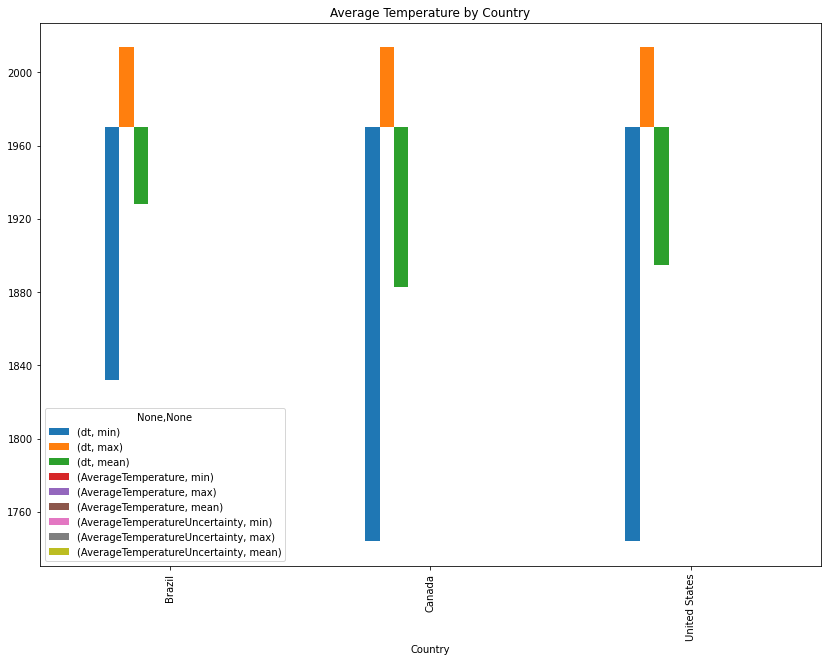

In [48]:
df_select.groupby(by="Country").agg(["min", "max", "mean"]).plot(kind='bar', 
                                                            figsize=(14,10), 
                                                            stacked=False, 
                                                            title="Average Temperature by Country", 
                                                            legend=True)
                                                            

AVERAGE TEMPERATURE BY COUNTRY

In [49]:
br_avg_temp = df_select[df_select.Country == "Brazil"].AverageTemperature
print(br_avg_temp)

22319     22.516
22320     23.198
22321     22.188
22322     20.045
22323     18.500
           ...  
198855    26.651
198856    25.757
198857    25.007
198858    24.419
198859    23.928
Name: AverageTemperature, Length: 12139, dtype: float64


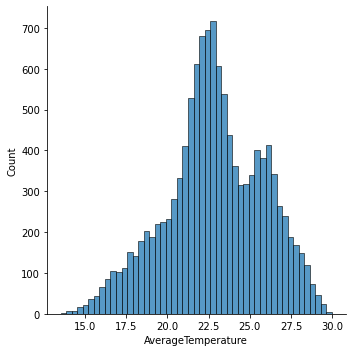

In [51]:
sns.displot(br_avg_temp)

<AxesSubplot:xlabel='AverageTemperature', ylabel='Count'>

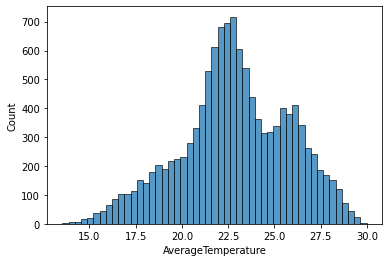

In [52]:
sns.histplot(br_avg_temp)

In [53]:
ca_avg_temp = df_select[df_select.Country == "Canada"].AverageTemperature
print(ca_avg_temp)

151957    -1.854
151962     5.164
151963    12.306
151964    18.401
151965    19.320
           ...  
232924    13.818
232925    17.367
232926    20.460
232927    18.520
232928    14.599
Name: AverageTemperature, Length: 6282, dtype: float64


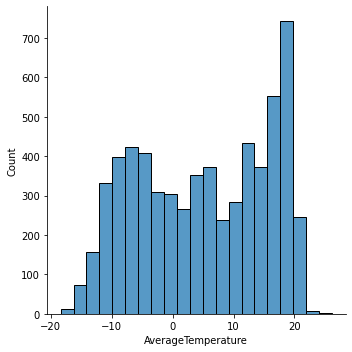

In [54]:
sns.displot(ca_avg_temp)

<AxesSubplot:xlabel='AverageTemperature', ylabel='Count'>

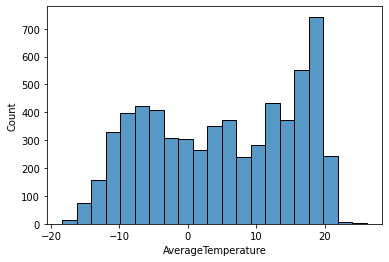

In [55]:
sns.histplot(ca_avg_temp)

In [56]:
us_avg_temp = df_select[df_select.Country == "United States"].AverageTemperature
print(us_avg_temp)

51674      5.436
51679      8.766
51680     11.605
51681     17.965
51682     21.680
           ...  
173003    15.544
173004    20.892
173005    24.722
173006    21.001
173007    17.408
Name: AverageTemperature, Length: 8237, dtype: float64


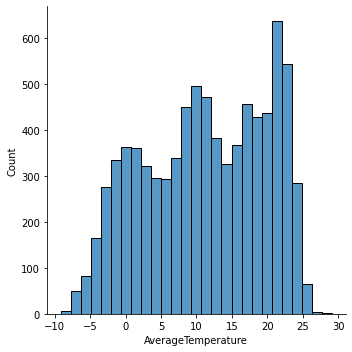

In [57]:
sns.displot(us_avg_temp)

<AxesSubplot:xlabel='AverageTemperature', ylabel='Count'>

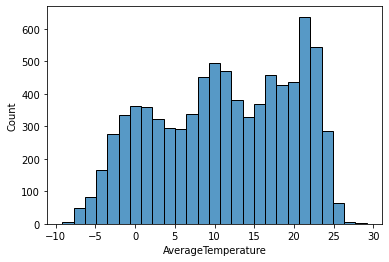

In [58]:
sns.histplot(us_avg_temp)

In [60]:
df_select.Country.value_counts().index  # unique values

Index(['Brazil', 'United States', 'Canada'], dtype='object')

In [66]:
countries = df_select.Country.unique()

/Users/robsontrajano/Library/Python/3.10/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/robsontrajano/Library/Python/3.10/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/robsontrajano/Library/Python/3.10/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

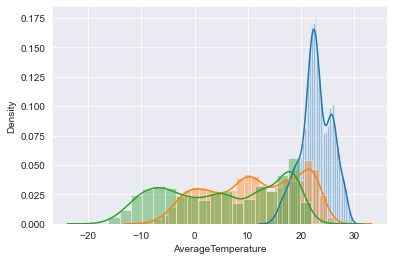

In [72]:
for country in countries:
    sns.distplot(df_select[df_select.Country == country].AverageTemperature)

/Users/robsontrajano/Library/Python/3.10/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/robsontrajano/Library/Python/3.10/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/robsontrajano/Library/Python/3.10/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

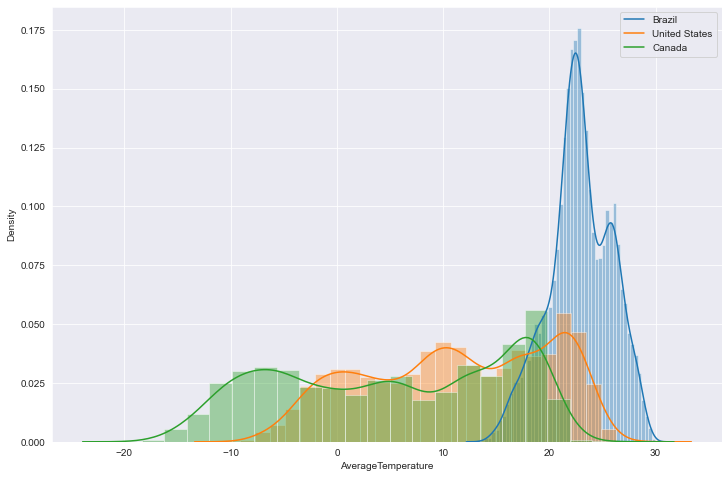

In [71]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))

for country in countries:
    sns.distplot(df_select[df_select.Country == country].AverageTemperature)

plt.legend(countries)

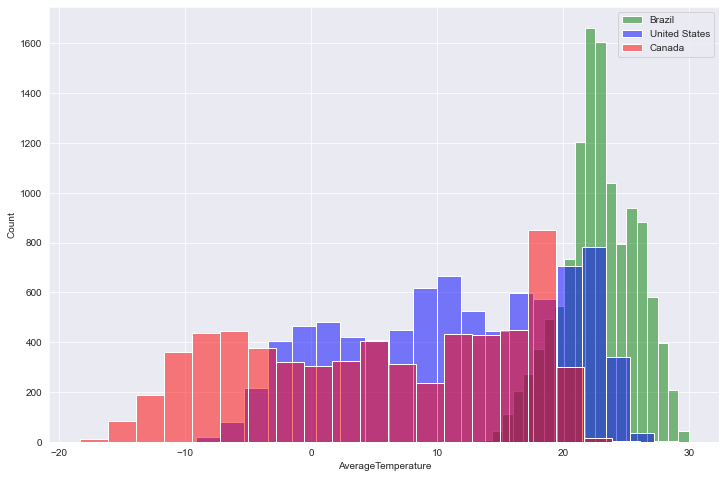

In [97]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
colors = ["red", "blue", "green"]
for country in countries:
    sns.histplot(df_select[df_select.Country == country].AverageTemperature, 
                                                        label=country, 
                                                        bins=20, 
                                                        alpha=0.5, 
                                                        color=colors.pop())

                                                        
                                                      
                                                        
                                                        
                                                        

                                                        

plt.legend(countries)

/Users/robsontrajano/Library/Python/3.10/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/robsontrajano/Library/Python/3.10/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/robsontrajano/Library/Python/3.10/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

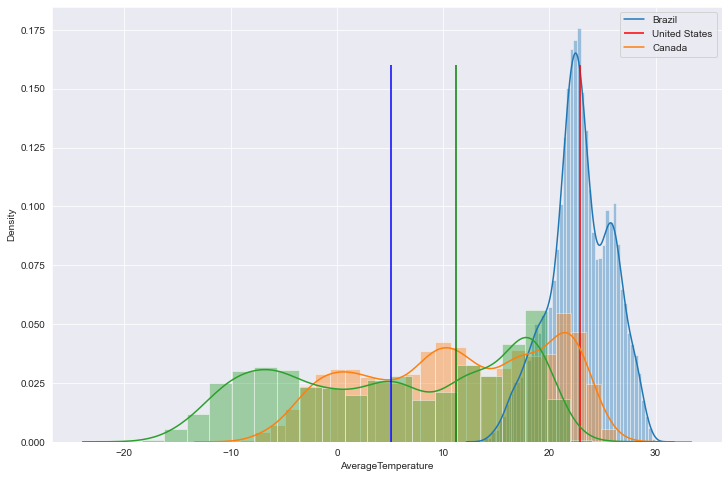

In [102]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
color = ["red", "green", "blue"]
for color, country in zip(color, countries):
    sns.distplot(df_select[df_select.Country == country].AverageTemperature)
    country_mean = df_select[df_select.Country == country].AverageTemperature.mean()
    plt.vlines(country_mean, 0, 0.16, color=color, label=country)

plt.legend(countries)

/Users/robsontrajano/Library/Python/3.10/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/robsontrajano/Library/Python/3.10/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/robsontrajano/Library/Python/3.10/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

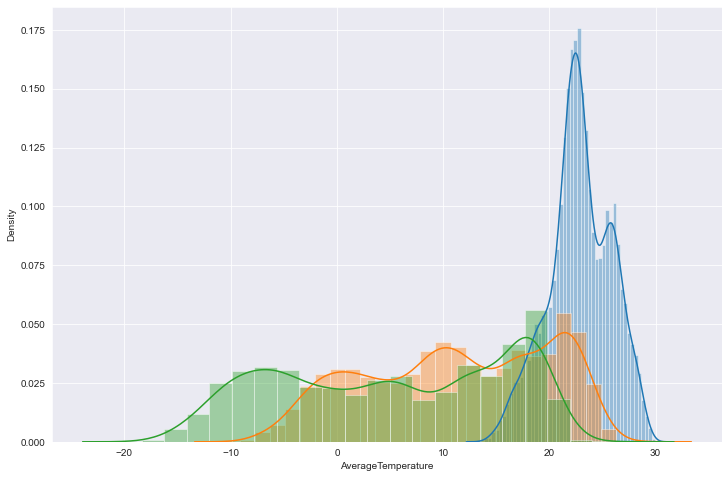

/Users/robsontrajano/Library/Python/3.10/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/robsontrajano/Library/Python/3.10/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/robsontrajano/Library/Python/3.10/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

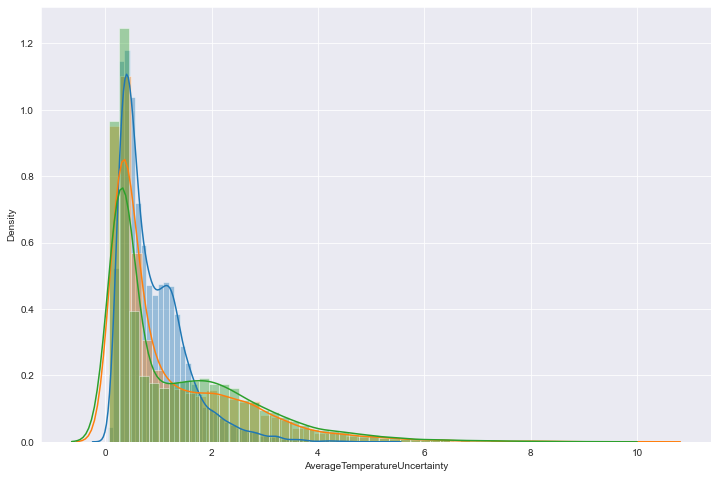

In [105]:

columns = df_select.columns[1:3]
countries = df_select.Country.unique()


for column in columns:
    plt.figure(figsize=(12,8))
    for country in countries:
        sns.distplot(df_select[df_select.Country == country][column])
    plt.show()

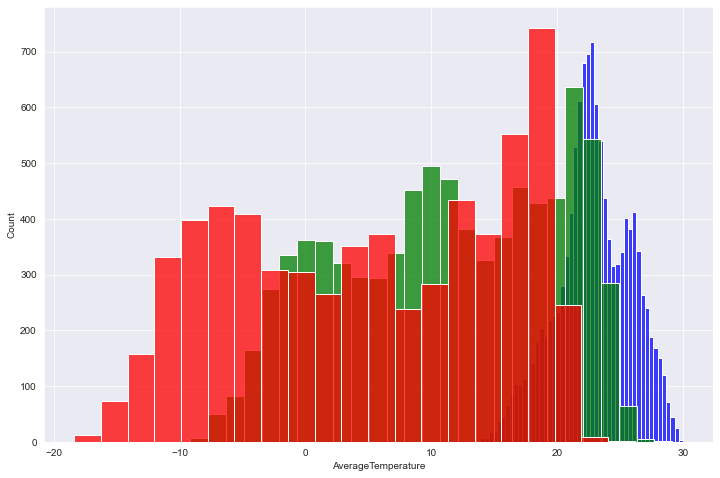

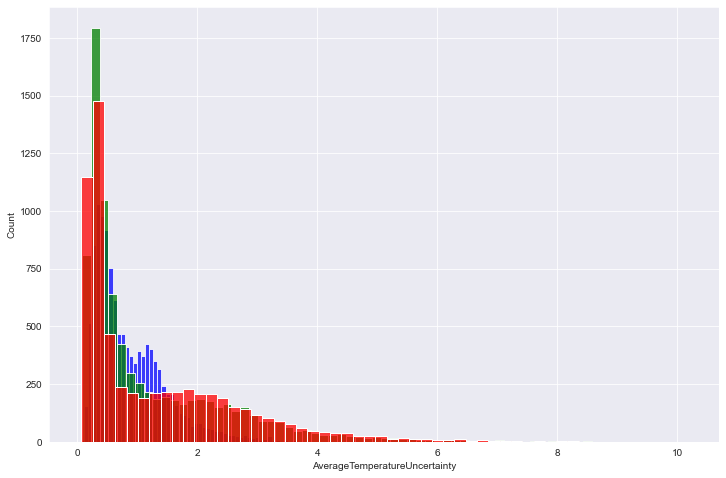

In [121]:

columns = df_select.columns[1:3]
countries = df_select.Country.unique()


for column in columns:
    colors = ["red", "green", "blue"]
    plt.figure(figsize=(12,8))
    for country in countries:
        sns.histplot(df_select[df_select.Country == country][column], color=colors.pop())
    plt.show()

WHAT IS A SCATTERPLOT? \
SCATTERPLOTS ARE PLOTS THAT SHOW THE RELATIONSHIP BETWEEN TWO VARIABLES.


In [122]:
df_select.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
22319,1832-01-01,22.516,1.556,Belo Horizonte,Brazil,20.09S,44.36W
22320,1832-02-01,23.198,3.471,Belo Horizonte,Brazil,20.09S,44.36W
22321,1832-03-01,22.188,1.667,Belo Horizonte,Brazil,20.09S,44.36W
22322,1832-04-01,20.045,2.743,Belo Horizonte,Brazil,20.09S,44.36W
22323,1832-05-01,18.500,2.253,Belo Horizonte,Brazil,20.09S,44.36W
22324,1832-06-01,18.043,2.059,Belo Horizonte,Brazil,20.09S,44.36W
22325,1832-07-01,17.749,2.747,Belo Horizonte,Brazil,20.09S,44.36W
22326,1832-08-01,18.510,2.570,Belo Horizonte,Brazil,20.09S,44.36W
22327,1832-09-01,19.754,2.998,Belo Horizonte,Brazil,20.09S,44.36W
22328,1832-10-01,20.629,2.249,Belo Horizonte,Brazil,20.09S,44.36W


In [125]:
df_select.Country.unique()

array(['Brazil', 'United States', 'Canada'], dtype=object)

UNITED STATES

In [126]:
us_data = df_select[(df_select.Country == "United States") & (df_select.dt > "01.01.1900")]
us_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
53549,1900-02-01,-3.409,0.894,Chicago,United States,42.59N,87.27W
53550,1900-03-01,-0.282,0.625,Chicago,United States,42.59N,87.27W
53551,1900-04-01,8.347,0.659,Chicago,United States,42.59N,87.27W
53552,1900-05-01,13.055,0.251,Chicago,United States,42.59N,87.27W
53553,1900-06-01,16.976,0.748,Chicago,United States,42.59N,87.27W


In [127]:
us_data.City.unique()

array(['Chicago', 'Los Angeles', 'New York'], dtype=object)

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

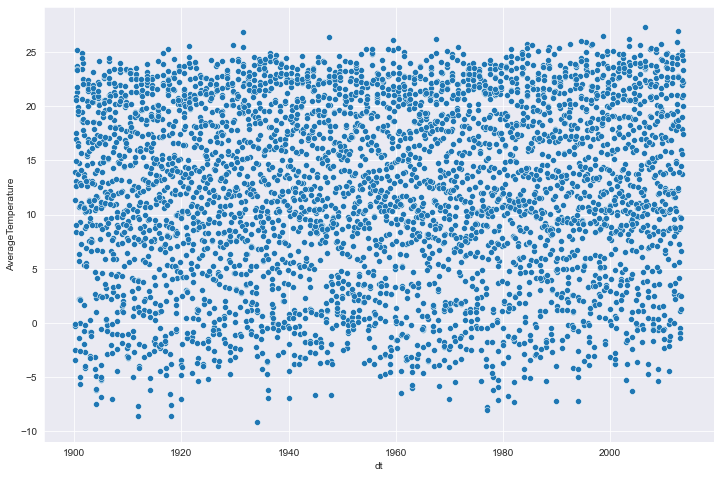

In [128]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = "dt", y = "AverageTemperature", data = us_data)

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

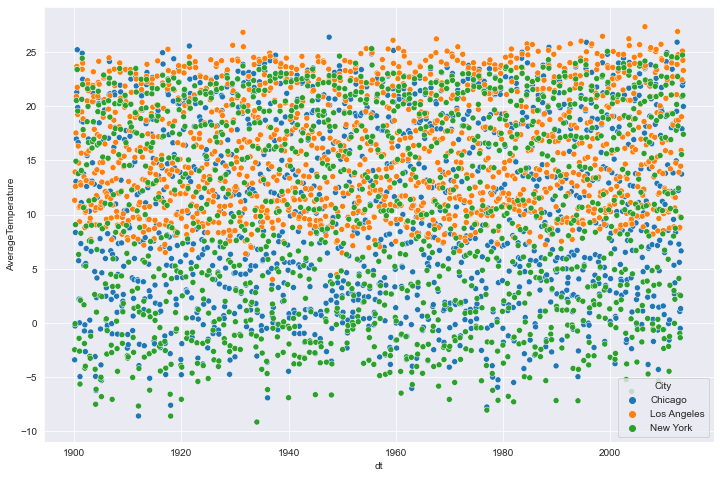

In [129]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = "dt", y = "AverageTemperature", data = us_data, hue = "City")

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

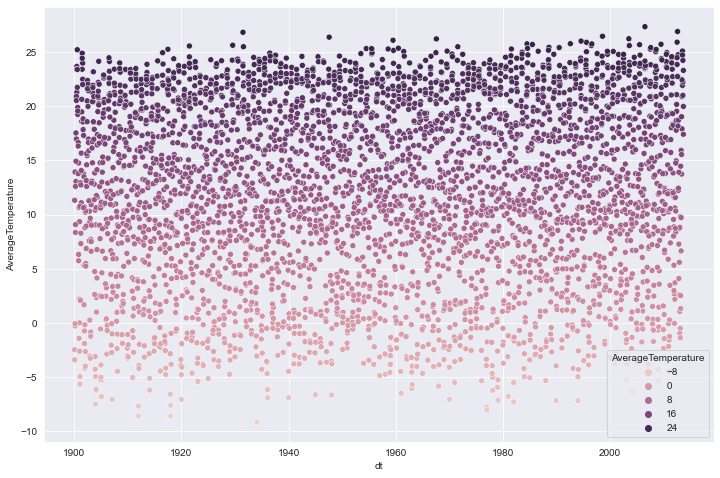

In [130]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = "dt", y = "AverageTemperature", data = us_data, hue = "AverageTemperature")

In [131]:
us_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
53549,1900-02-01,-3.409,0.894,Chicago,United States,42.59N,87.27W
53550,1900-03-01,-0.282,0.625,Chicago,United States,42.59N,87.27W
53551,1900-04-01,8.347,0.659,Chicago,United States,42.59N,87.27W
53552,1900-05-01,13.055,0.251,Chicago,United States,42.59N,87.27W
53553,1900-06-01,16.976,0.748,Chicago,United States,42.59N,87.27W


In [132]:
us_data_mean = us_data.groupby(us_data.dt.dt.to_period("Y")).mean()
us_data_mean = us_data_mean.reset_index()
us_data_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype        
---  ------                         --------------  -----        
 0   dt                             114 non-null    period[A-DEC]
 1   AverageTemperature             114 non-null    float64      
 2   AverageTemperatureUncertainty  114 non-null    float64      
dtypes: float64(2), period[A-DEC](1)
memory usage: 2.8 KB


In [134]:
us_data_mean.head()

,dt,AverageTemperature,AverageTemperatureUncertainty
0,1900,13.191152,0.577606
1,1901,11.626861,0.587250
2,1902,11.514556,0.490500
3,1903,11.459278,0.555972
4,1904,10.887944,0.523306


In [135]:
us_data_mean.dt = us_data_mean.dt.astype("string").astype("datetime64")

In [136]:
us_data_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             114 non-null    datetime64[ns]
 1   AverageTemperature             114 non-null    float64       
 2   AverageTemperatureUncertainty  114 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.8 KB


<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

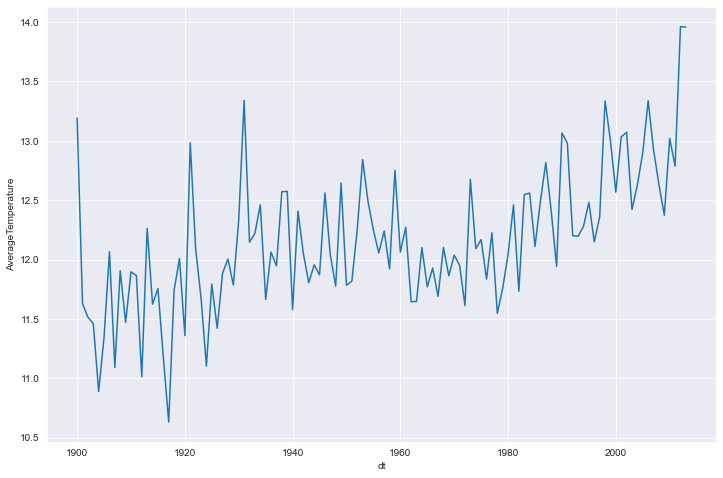

In [137]:
plt.figure(figsize=(12,8))
sns.lineplot(x = "dt", y = "AverageTemperature", data = us_data_mean)

CANADA

In [138]:
canada_data = df_select[(df_select.Country == "Canada") & (df_select.dt > "01.01.1900")]
canada_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
153832,1900-02-01,-10.393,0.472,Montreal,Canada,45.81N,72.69W
153833,1900-03-01,-8.127,0.649,Montreal,Canada,45.81N,72.69W
153834,1900-04-01,4.910,0.378,Montreal,Canada,45.81N,72.69W
153835,1900-05-01,10.001,0.815,Montreal,Canada,45.81N,72.69W
153836,1900-06-01,17.267,0.525,Montreal,Canada,45.81N,72.69W


In [140]:
canada_data.City.unique()

array(['Montreal', 'Toronto'], dtype=object)

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

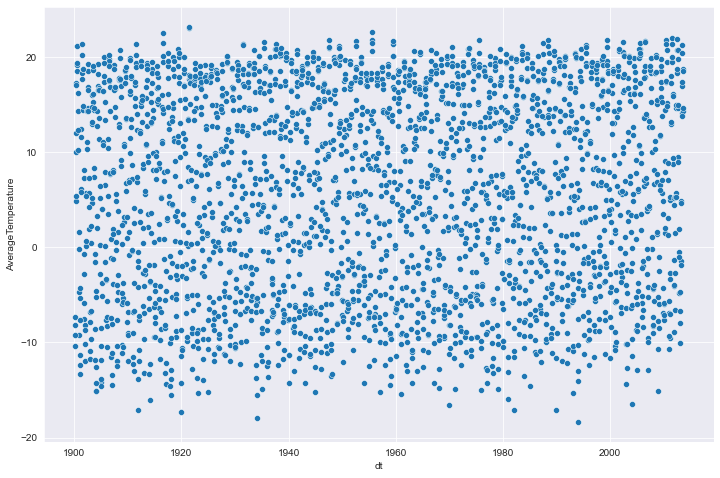

In [141]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = "dt", y = "AverageTemperature", data = canada_data)

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

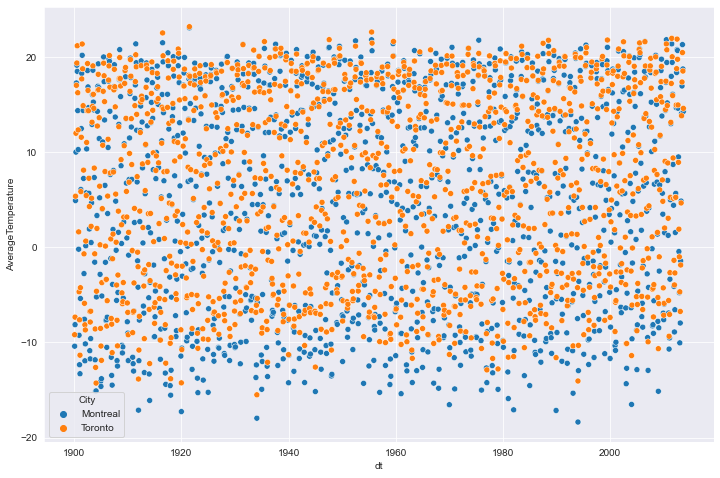

In [142]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = "dt", y = "AverageTemperature", data = canada_data, hue = "City")

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

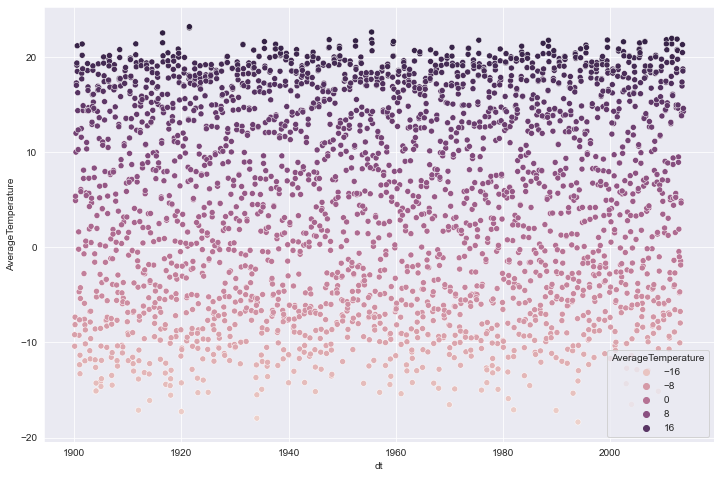

In [143]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = "dt", y = "AverageTemperature", data = canada_data, hue = "AverageTemperature")

In [144]:
canada_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
153832,1900-02-01,-10.393,0.472,Montreal,Canada,45.81N,72.69W
153833,1900-03-01,-8.127,0.649,Montreal,Canada,45.81N,72.69W
153834,1900-04-01,4.910,0.378,Montreal,Canada,45.81N,72.69W
153835,1900-05-01,10.001,0.815,Montreal,Canada,45.81N,72.69W
153836,1900-06-01,17.267,0.525,Montreal,Canada,45.81N,72.69W


In [145]:
canada_data_mean = canada_data.groupby(canada_data.dt.dt.to_period("Y")).mean()
canada_data_mean = canada_data_mean.reset_index()
canada_data_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype        
---  ------                         --------------  -----        
 0   dt                             114 non-null    period[A-DEC]
 1   AverageTemperature             114 non-null    float64      
 2   AverageTemperatureUncertainty  114 non-null    float64      
dtypes: float64(2), period[A-DEC](1)
memory usage: 2.8 KB


In [146]:
canada_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
153832,1900-02-01,-10.393,0.472,Montreal,Canada,45.81N,72.69W
153833,1900-03-01,-8.127,0.649,Montreal,Canada,45.81N,72.69W
153834,1900-04-01,4.910,0.378,Montreal,Canada,45.81N,72.69W
153835,1900-05-01,10.001,0.815,Montreal,Canada,45.81N,72.69W
153836,1900-06-01,17.267,0.525,Montreal,Canada,45.81N,72.69W


In [147]:
canada_data_mean.dt = canada_data_mean.dt.astype("string").astype("datetime64")

In [148]:
canada_data_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             114 non-null    datetime64[ns]
 1   AverageTemperature             114 non-null    float64       
 2   AverageTemperatureUncertainty  114 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.8 KB


<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

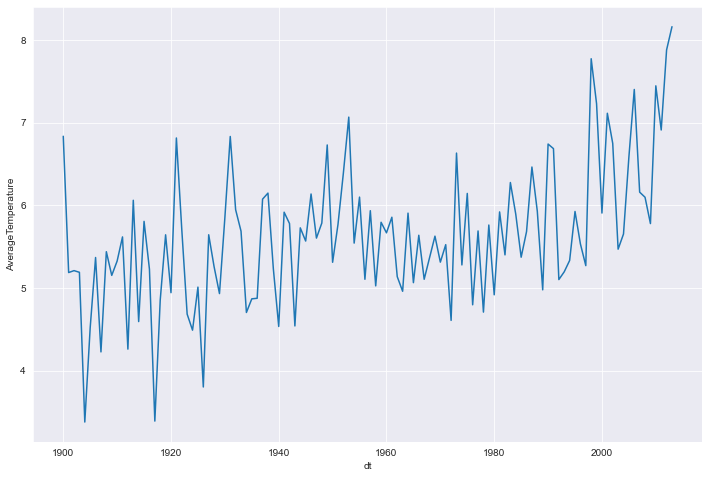

In [149]:
plt.figure(figsize=(12,8))
sns.lineplot(x = "dt", y = "AverageTemperature", data = canada_data_mean)

In [154]:
df_1990 = df_select[df_select.dt > "01.01.1990"]
df_1990.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
24216,1990-02-01,23.800,0.208,Belo Horizonte,Brazil,20.09S,44.36W
24217,1990-03-01,24.401,0.290,Belo Horizonte,Brazil,20.09S,44.36W
24218,1990-04-01,23.322,0.313,Belo Horizonte,Brazil,20.09S,44.36W
24219,1990-05-01,19.792,0.155,Belo Horizonte,Brazil,20.09S,44.36W
24220,1990-06-01,18.722,0.326,Belo Horizonte,Brazil,20.09S,44.36W


In [155]:
df_1990.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
232924,2013-05-01,13.818,0.278,Toronto,Canada,44.20N,80.50W
232925,2013-06-01,17.367,0.226,Toronto,Canada,44.20N,80.50W
232926,2013-07-01,20.460,0.290,Toronto,Canada,44.20N,80.50W
232927,2013-08-01,18.520,0.342,Toronto,Canada,44.20N,80.50W
232928,2013-09-01,14.599,1.274,Toronto,Canada,44.20N,80.50W


In [156]:
df_means = df_1990.groupby(["Country", df_1990.dt.dt.to_period("Y")]).mean()
df_means = df_means.reset_index()
df_means.dt = df_means.dt.astype("string").astype("datetime64")
df_means.info()
df_means

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Country                        72 non-null     object        
 1   dt                             72 non-null     datetime64[ns]
 2   AverageTemperature             72 non-null     float64       
 3   AverageTemperatureUncertainty  72 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 2.4+ KB


,Country,dt,AverageTemperature,AverageTemperatureUncertainty
0,Brazil,1990-01-01,23.539833,0.354879
1,Brazil,1991-01-01,23.362264,0.352847
2,Brazil,1992-01-01,23.365306,0.395958
3,Brazil,1993-01-01,23.864139,0.369875
4,Brazil,1994-01-01,23.816722,0.367708
...,...,...,...,...
67,United States,2009-01-01,12.372389,0.325028
68,United States,2010-01-01,13.020167,0.337444
69,United States,2011-01-01,12.787111,0.355472
70,United States,2012-01-01,13.960778,0.393278


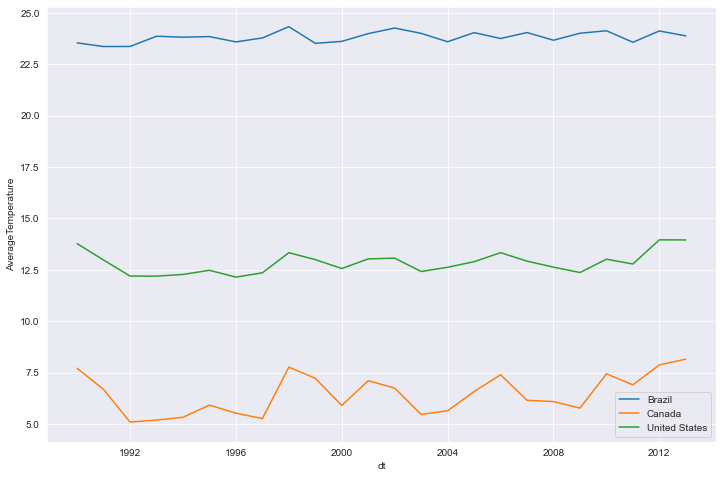

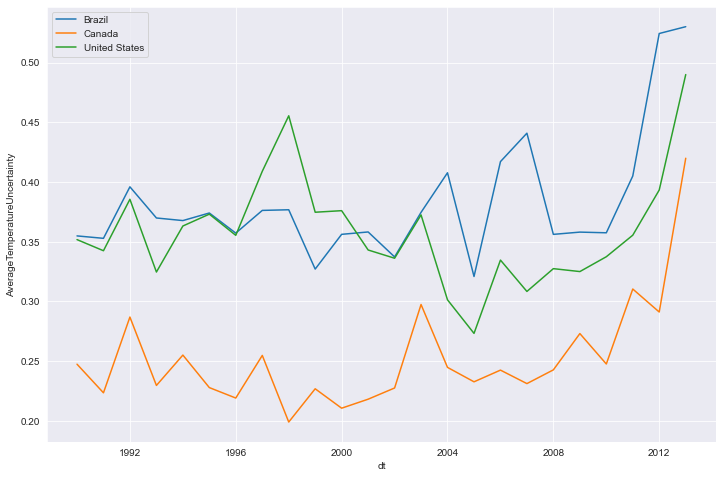

In [157]:
for column in df_means.columns[2:4]:
    plt.figure(figsize=(12,8))

    for country in df_means.Country.unique():
        data = df_means[df_means.Country == country]
        sns.lineplot(x = "dt", y = column, data = data)
    plt.legend(df_means.Country.unique())
    plt.show()


In [158]:
df.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
5,1849-06-01,24.844,1.402,Abidjan,Côte D'Ivoire,5.63N,3.23W
6,1849-07-01,24.058,1.254,Abidjan,Côte D'Ivoire,5.63N,3.23W
7,1849-08-01,23.576,1.265,Abidjan,Côte D'Ivoire,5.63N,3.23W
8,1849-09-01,23.662,1.226,Abidjan,Côte D'Ivoire,5.63N,3.23W
9,1849-10-01,25.263,1.175,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [159]:
df.Country.unique()

array(["Côte D'Ivoire", 'Ethiopia', 'India', 'Syria', 'Egypt', 'Turkey',
       'Iraq', 'Thailand', 'Brazil', 'Germany', 'Colombia',
       'South Africa', 'Morocco', 'China', 'United States', 'Senegal',
       'Tanzania', 'Bangladesh', 'Pakistan', 'Zimbabwe', 'Vietnam',
       'Nigeria', 'Indonesia', 'Saudi Arabia', 'Afghanistan', 'Ukraine',
       'Congo (Democratic Republic Of The)', 'Peru', 'United Kingdom',
       'Angola', 'Spain', 'Philippines', 'Iran', 'Australia', 'Mexico',
       'Somalia', 'Canada', 'Russia', 'Japan', 'Kenya', 'France', 'Burma',
       'Italy', 'Chile', 'Dominican Republic', 'South Korea', 'Singapore',
       'Taiwan', 'Sudan'], dtype=object)